In [1]:
#姓名：洪祎麟 学号：2020217793  班级：电信科20-1班

In [2]:
#第九次作业第一题

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import faker

In [4]:
#第一小题 

In [5]:
stid = ['202021' + str(i).zfill(2) + str(j).zfill(2) for i in range(1, 6) for j in range(1, 46)] #构建学号

clname = ['电信科20-' + str(i) for i in range(1, 6) for j in range(45)] #构建班级

fak = faker.Faker('zh_cn')
name = [fak.name() for i in range(225)]  #构建姓名

grade = np.random.normal(75, 8, size=(225, 5)) 
df = pd.DataFrame(data=grade, columns=["高等数学", "英语", "python", "普通物理", "科学导论"]).astype(np.int64) #正态分布生成成绩

In [6]:
#第二小题

In [7]:
df['学号'] = stid
df['姓名'] = name
df['班级'] = clname

df = df.set_index('学号')
name = df[['班级', '姓名']]
df = pd.merge(name, df, on='学号', how='inner')
df.drop(axis=1, columns=['班级_y', '姓名_y'], inplace=True)
df.rename(columns={'班级_x': '班级', '姓名_x': '姓名'}, inplace=True)  #把班级，姓名调换至前两列中

df.to_csv("0901.csv", encoding='gbk')  #保存为csv格式，需要注意编码问题转换gbk
df.to_excel("0901.xlsx")   #保存为.xlsx格式

In [8]:
#第三小题

In [9]:
tj = df.describe()
print(tj.loc['max'], tj.loc['min'], tj.loc['mean'], sep='\n')  #求出每门课程的最高分，最低分和平局分

高等数学      98.0
英语        99.0
python    90.0
普通物理      96.0
科学导论      97.0
Name: max, dtype: float64
高等数学      56.0
英语        51.0
python    55.0
普通物理      53.0
科学导论      51.0
Name: min, dtype: float64
高等数学      74.631111
英语        74.480000
python    74.426667
普通物理      74.675556
科学导论      73.706667
Name: mean, dtype: float64


In [10]:
#第四小题

In [24]:
#按照班级保存到五处
dxk1 = df[df['班级'] == "电信科20-1"]
dxk2 = df[df['班级'] == "电信科20-2"]
dxk3 = df[df['班级'] == "电信科20-3"]
dxk4 = df[df['班级'] == "电信科20-4"]
dxk5 = df[df['班级'] == "电信科20-5"]

#输出电信科20-1班的高数最高，最低分
print("电信科20-1班高数的最高分为", str(dxk1.describe().loc['max']['高等数学']) + "，最低分为", str(dxk1.describe().loc['min']['高等数学']))

#输出电信科20-2班英语的均分和方差
print("电信科20-2班英语的平均分为{:.2f}，方差为{:.2f}".format(dxk2.describe().loc['mean']['英语'],dxk2["英语"].var()))

#输出电信科20-3班高数的最高，最低分，平均分和方差
print("电信科20-3班高数的最高分为", str(dxk3.describe().loc['max']['高等数学']) + "，最低分为", str(dxk3.describe().loc['min']['高等数学'])+"，英语的平均分为{:.2f}，方差为{:.2f}".format(dxk3.describe().loc['mean']['英语'],dxk3["英语"].var()))

#输出电信科20-4班的后25%，50%，75%的分数线
print("电信科20-4班普通物理的25%分数线为", str(dxk4.describe().loc['25%']['普通物理']) + "，50%分数线为", str(dxk4.describe().loc['50%']['普通物理'])+ "，75%分数线为", str(dxk4.describe().loc['75%']['普通物理']))

#输出学号为2020210510学生的相关信息
print("电信科20-5班学号为 2020210510 学生的相关信息为：", df.loc['2020210510'])

电信科20-1班高数的最高分为 86.0，最低分为 61.0
电信科20-2班英语的平均分为74.47，方差为86.75
电信科20-3班高数的最高分为 87.0，最低分为 56.0，英语的平均分为74.18，方差为88.15
电信科20-4班普通物理的25%分数线为 68.0，50%分数线为 72.0，75%分数线为 81.0
电信科20-5班学号为 2020210510 学生的相关信息为： 班级        电信科20-5
姓名             丁坤
高等数学           75
英语             69
python         77
普通物理           87
科学导论           54
Name: 2020210510, dtype: object


In [12]:
#第五小题

In [13]:
#切片处理生成电信科20-3班和电信科20-4班的数据集
df3=df[90:135]
df4=df[135:180]

#保存为xlsx文件
df3.to_excel("电信科20-3（合并前）.xlsx")
df4.to_excel("电信科20-4.xlsx")

#获得三班的班级，姓名和四班的五门科目成绩
name1 = df3[['班级', '姓名']]
score1= df4[["高等数学", "英语", "python", "普通物理", "科学导论"]]

#让两组数据合并
j=[str(i) for i in range(1,46)]

x=pd.DataFrame(name1)
y=pd.DataFrame(score1)

x.loc[:,'序号'] = j
y.loc[:,'序号'] = j

df2 = pd.merge(x, y, on='序号', how='inner')
df2 = df2.set_index('序号')


#转换为xlsx文件
df2.to_excel("电信科20-3（合并后）.xlsx") 



In [14]:
#第六小题（提高题）

(array([1., 0., 0., 0., 0., 0., 0., 2., 1., 1., 0., 2., 1., 4., 4., 3., 2.,
       1., 3., 2., 3., 3., 0., 2., 0., 1., 2., 2., 3., 2.]), array([56.        , 57.03333333, 58.06666667, 59.1       , 60.13333333,
       61.16666667, 62.2       , 63.23333333, 64.26666667, 65.3       ,
       66.33333333, 67.36666667, 68.4       , 69.43333333, 70.46666667,
       71.5       , 72.53333333, 73.56666667, 74.6       , 75.63333333,
       76.66666667, 77.7       , 78.73333333, 79.76666667, 80.8       ,
       81.83333333, 82.86666667, 83.9       , 84.93333333, 85.96666667,
       87.        ]), <BarContainer object of 30 artists>)


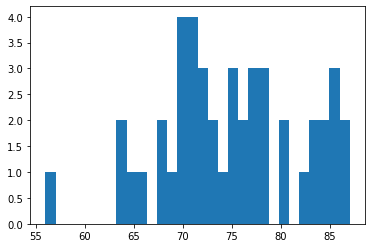

In [15]:
#生成高数的直方图
print(plt.hist(dxk3['高等数学'],bins=30))

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001C652771850>, <matplotlib.lines.Line2D object at 0x000001C652771BB0>], 'caps': [<matplotlib.lines.Line2D object at 0x000001C652771F10>, <matplotlib.lines.Line2D object at 0x000001C6527802B0>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001C6527714F0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001C652780610>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001C652780970>], 'means': []}


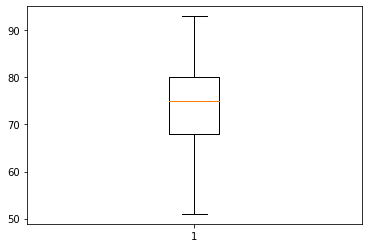

In [16]:
#生成英语箱线图
print(plt.boxplot(dxk3['英语']))